In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-prices-dataset/Housing.csv


In [5]:
df=pd.read_csv("/kaggle/input/housing-prices-dataset/Housing.csv")

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

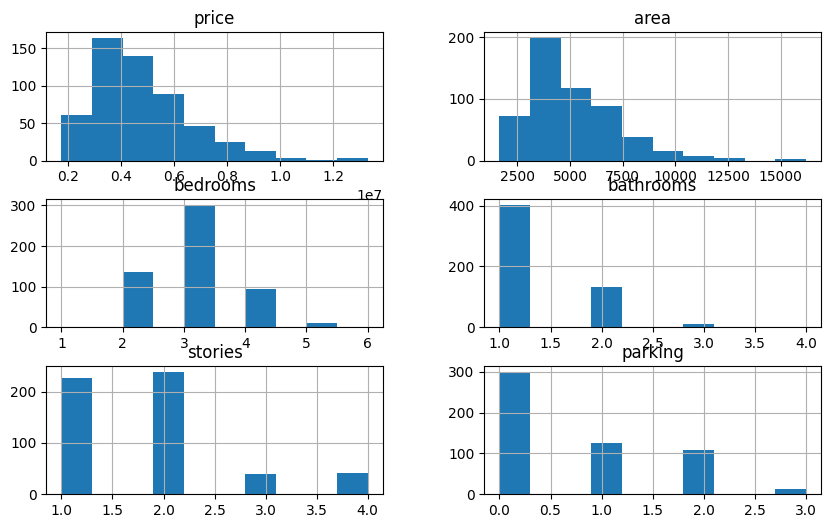

In [11]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(10,6))
plt.show()

We observe that 'price' is right skewed.

'Area' is also right skewed.
Lets Visualize use Box plots to Visualize this.

<function matplotlib.pyplot.show(close=None, block=None)>

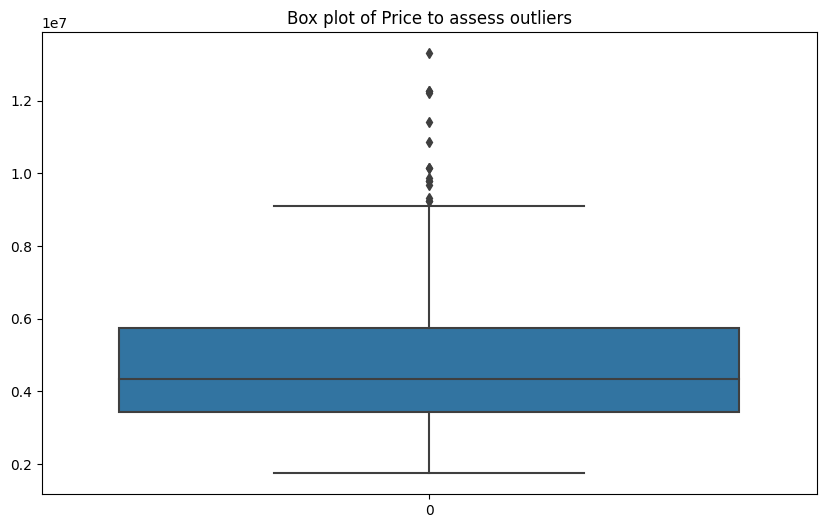

In [12]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(df['price'])
plt.title('Box plot of Price to assess outliers')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

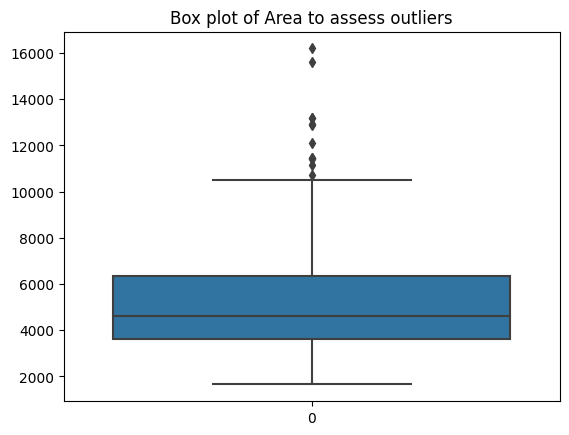

In [13]:
sns.boxplot(df['area'])
plt.title('Box plot of Area to assess outliers')
plt.show

Let us remove outliers in area using the IQR method

In [14]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]

In [15]:
# Replace outliers with the median of the column
median_area = df['area'].median()
df['area'] = np.where((df['area'] < lower_bound) | (df['area'] > upper_bound), median_area, df['area'])


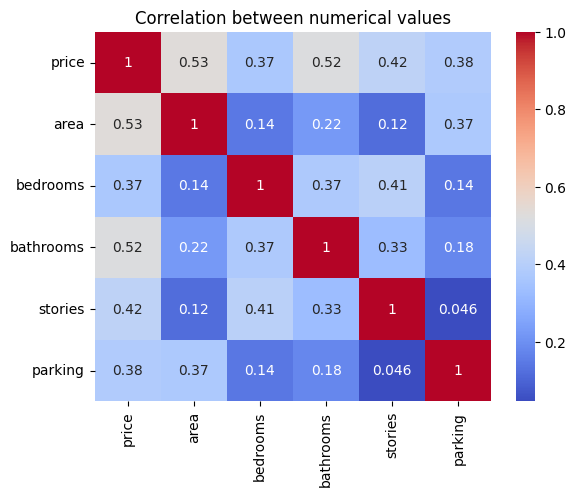

In [16]:
correlation_matrix=df.corr(numeric_only=True)

sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm')
plt.title("Correlation between numerical values")
plt.show()

We observe that there is 0.53 correlation between price and area.
We observe that there is 0.52 correlation between price and bathrooms.
We observe that there is 0.42 correlation between price and stories.

it also suggest that parking , araa, price might mave multi-collinearity.

In [17]:
# Step 3: Preprocessing Steps.
# Encode Categorical Variables
print("\nEncoding Categorical Variables...")
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


Encoding Categorical Variables...


We normalize the features because they have different scales

In [18]:

from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['price'])
y = df['price']
# Normalize Numerical Features
print("\nNormalizing Numerical Features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df['area'].values.reshape(-1, 1))



Normalizing Numerical Features...


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, train_size=0.7, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error , r2_score,mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)



print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE) (R2): {rmse:.2f}")
print(f"Mean Accuracy Error (MAE): {mae:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 3442704106500.54
R-squared (R2): 0.20
Root Mean Squared Error (RMSE) (R2): 1855452.53
Mean Accuracy Error (MAE): 1442762.90



Scatter Plot of Actual vs Predicted Values...


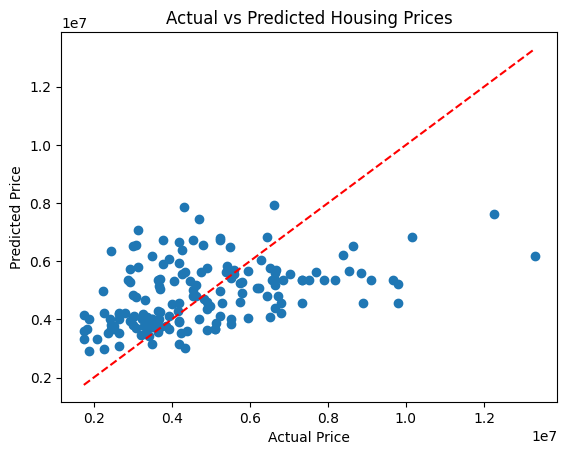

In [22]:
# Scatter Plot of Actual vs Predicted Values
print("\nScatter Plot of Actual vs Predicted Values...")
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Housing Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()